In [ ]:

#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:
#!apt-get update
#!apt-get install -y libsndfile1

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1581 B]
Get:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]    
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]        
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1698 kB]
Get:6 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]       
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]      
Get:8 https://packages.cloud.google.com/apt google-fast-socket InRelease [1071 B]
Err:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease             
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY C0BA5CE6DC6315A3
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 kB]      
Err:6 https://packages.cloud.google.com/

In [ ]:
#!pip3 install pipreqsnb

  Preparing metadata (setup.py) ... done
  Created wheel for pipreqsnb: filename=pipreqsnb-0.2.4-py3-none-any.whl size=4142 sha256=4e61bf3b0b26d81f4ce674a3f0653cf1f4c39793265001ddfb330732d5b29566
  Stored in directory: /root/.cache/pip/wheels/23/7f/59/7a87faea552278c8ef0c171ea4d27494eb91ac9380567239b6
Successfully built pipreqsnb


In [ ]:
#!pipreqsnb --savepath /kaggle/working/requirements.txt

pipreqs  --savepath /kaggle/working/requirements.txt /kaggle/working


# Importing Data

                                              Ravdess Dataframe
Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

In [ ]:
#preparing data set

ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list.sort()
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
len(ravdess_directory_list)

24

In [ ]:
#Crema = "/kaggle/input/cremad/AudioWAV/"
#Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
#Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

# preprocessing

**Ravdees**

In [ ]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)


In [ ]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-04-02-02-02-24.wav
03
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-02-01.wav
3
03-01-03-02-02-01-24.wav


In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())



  Emotions                                               Path
0  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
1  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
3  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
4  neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
______________________________________________
      Emotions                                               Path
1435     happy  /kaggle/input/ravdess-emotional-speech-audio/a...
1436     happy  /kaggle/input/ravdess-emotional-speech-audio/a...
1437   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
1438  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1439     happy  /kaggle/input/ravdess-emotional-speech-audio/a...
_______________________________________________
neutral     288
sad         192
fear        192
happy       192
disgust     192
angry       192
surprise    192
Name: Emotions, dtype: in

**Integration**

In [ ]:

data_path = ravdess_df
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,sad,/kaggle/input/ravdess-emotional-speech-audio/a...
3,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [ ]:
print(data_path.Emotions.value_counts())


neutral     288
sad         192
fear        192
happy       192
disgust     192
angry       192
surprise    192
Name: Emotions, dtype: int64


>*                           Data Visualisation and Exploration

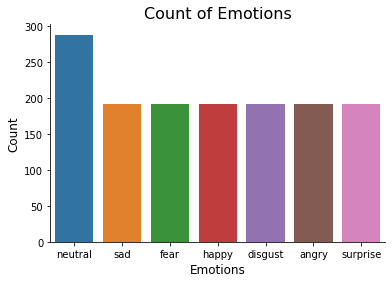

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
data,sr = librosa.load(file_path[0])
sr

22050

In [ ]:
ipd.Audio(data,rate=sr)

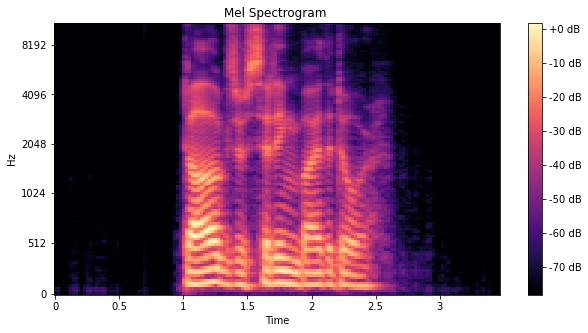

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

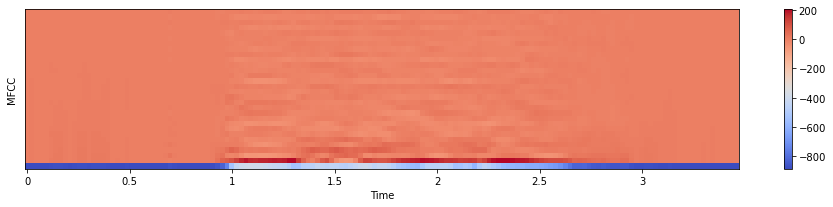

In [ ]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

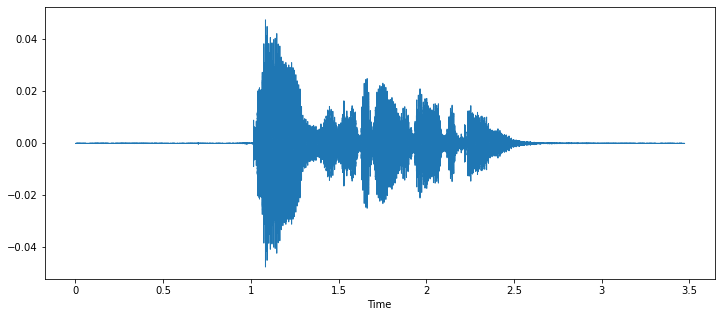

In [ ]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

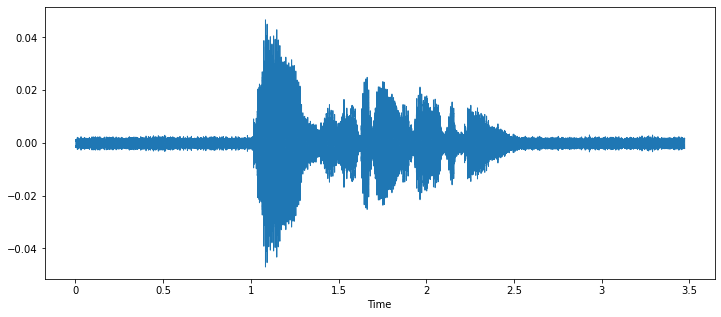

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

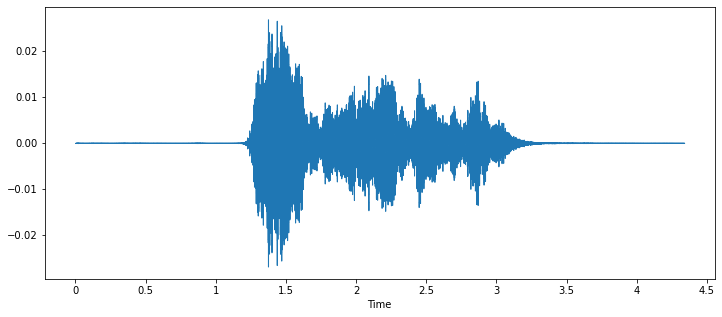

In [ ]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

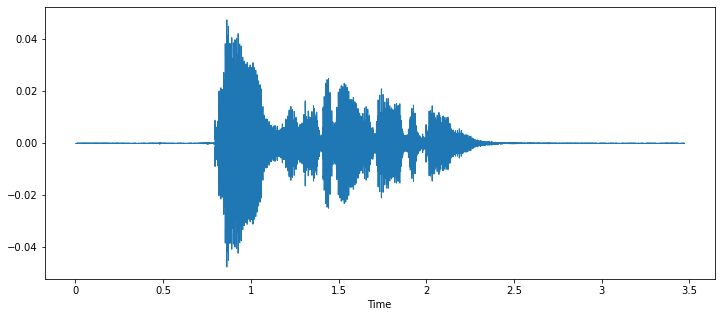

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

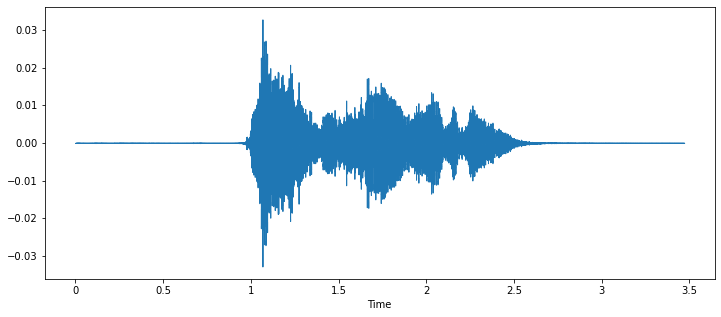

In [ ]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# Feature extraction

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio


In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


# Noraml way to get features

In [ ]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index == 100:
        print(f'{index} audio has been processed')
        break
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

100it [00:53,  1.86it/s]

100 audio has been processed
Done
Time:  53.79952242200011


# Faster way to get features
***Parallel way***

**Dont be afraid from red lines that Normal**


This code is an example of how to use the joblib library to process multiple audio files in parallel using the process_feature function. The code also uses the timeit library to measure the time taken to process the audio files.

Here's a breakdown of what the code does:

The from joblib import Parallel, delayed statement imports the Parallel and delayed functions from the joblib library.
The start = timeit.default_timer() statement starts a timer to measure the time taken to process the audio files.
The process_feature function processes a single audio file by extracting its features using the get_feat function and appending the corresponding X and Y values to the X and Y lists.
The paths and emotions variables extract the paths and emotions from the data_path DataFrame.
The Parallel function runs the process_feature function in parallel for each audio file using the delayed function to wrap the process_feature function.
The results variable contains the X and Y values for each audio file.
The X and Y lists are populated with the X and Y values from each audio file using the extend method.
The stop = timeit.default_timer() statement stops the timer.
The print('Time: ', stop - start) statement prints the time taken to process the audio files.
Overall, this code demonstrates how to use the joblib library to process multiple audio files in parallel, which can significantly reduce the processing time for large datasets.This code is an example of how to use the joblib library to process multiple audio files in parallel using the process_feature function. The code also uses the timeit library to measure the time taken to process the audio files.

Here's a breakdown of what the code does:

The from joblib import Parallel, delayed statement imports the Parallel and delayed functions from the joblib library.
The start = timeit.default_timer() statement starts a timer to measure the time taken to process the audio files.
The process_feature function processes a single audio file by extracting its features using the get_feat function and appending the corresponding X and Y values to the X and Y lists.
The paths and emotions variables extract the paths and emotions from the data_path DataFrame.
The Parallel function runs the process_feature function in parallel for each audio file using the delayed function to wrap the process_feature function.
The results variable contains the X and Y values for each audio file.
The X and Y lists are populated with the X and Y values from each audio file using the extend method.
The stop = timeit.default_timer() statement stops the timer.
The print('Time: ', stop - start) statement prints the time taken to process the audio files.
Overall, this code demonstrates how to use the joblib library to process multiple audio files in parallel, which can significantly reduce the processing time for large datasets.

*  The .extend() method increases the length of the list by the number of elements that are provided to the method, so if you want to add multiple elements to the list, you can use this method.

In [ ]:
len(X), len(Y), data_path.Path.shape


(400, 400, (1440,))

# Saving features

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.287109,0.472168,0.678711,0.713379,0.771484,0.738281,0.701660,0.623535,0.568848,0.477051,...,2.193105,1.998253,1.889437,1.860642,1.899702,1.989541,2.109758,2.238418,2.353952,neutral
1,0.227539,0.353516,0.476562,0.485840,0.497070,0.489258,0.481934,0.480957,0.480957,0.484863,...,-0.846727,-2.739971,2.474846,-0.304476,-5.270568,-5.953072,-5.751496,-6.316911,-1.600443,neutral
2,0.249512,0.379395,0.503418,0.513672,0.556641,0.532715,0.514160,0.468750,0.431152,0.421875,...,1.165555,1.091261,1.062005,1.071292,1.109089,1.162789,1.218299,1.261432,1.279048,neutral
3,0.238770,0.367676,0.489258,0.492676,0.494629,0.497070,0.502441,0.502441,0.504883,0.505859,...,-2.219136,3.248893,-0.423545,-5.547341,-1.089028,-2.655261,-5.927000,-7.361658,-4.576371,neutral
4,0.170410,0.306152,0.468262,0.552734,0.535156,0.553223,0.555176,0.569336,0.626465,0.576172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [ ]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.287109,0.472168,0.678711,0.713379,0.771484,0.738281,0.701660,0.623535,0.568848,0.477051,...,2.193105,1.998253,1.889437,1.860642,1.899702,1.989541,2.109758,2.238418,2.353952,neutral
1,0.227539,0.353516,0.476562,0.485840,0.497070,0.489258,0.481934,0.480957,0.480957,0.484863,...,-0.846727,-2.739971,2.474846,-0.304476,-5.270568,-5.953072,-5.751496,-6.316911,-1.600443,neutral
2,0.249512,0.379395,0.503418,0.513672,0.556641,0.532715,0.514160,0.468750,0.431152,0.421875,...,1.165555,1.091261,1.062005,1.071292,1.109089,1.162789,1.218299,1.261432,1.279048,neutral
3,0.238770,0.367676,0.489258,0.492676,0.494629,0.497070,0.502441,0.502441,0.504883,0.505859,...,-2.219136,3.248893,-0.423545,-5.547341,-1.089028,-2.655261,-5.927000,-7.361658,-4.576371,neutral
4,0.170410,0.306152,0.468262,0.552734,0.535156,0.553223,0.555176,0.569336,0.626465,0.576172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [ ]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(400, 2377)

In [ ]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

# Data preparation

In [ ]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [ ]:
print(Y.shape)

X.shape

(400, 7)


(400, 2376)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 2376), (320, 7), (80, 2376), (80, 7))

In [ ]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 2376), (320, 7), (80, 2376), (80, 7))

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

> Applying early stopping for all models


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:

early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

# LSTM Model

Model that have lstm layers take alot of time if you have much free time enjoy with it

In [ ]:
model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.3))
model01.add(LSTM(128))
#model01.add(Dropout(0.3))
model01.add(Dense(7,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2376, 128)         66560     
_________________________________________________________________
dropout (Dropout)            (None, 2376, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2376, 128)         131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 2376, 128)         131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 2376, 128)         131584    
_________________________________________________________________
lstm_4 (LSTM)                (None, 2376, 128)         131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 2376, 128)         1

In [ ]:
hist=model01.fit(X_train, y_train,
                 epochs=20,
                validation_data=(X_test, y_test),batch_size=64,
                verbose=1)

Epoch 1/20
5/5 [==============================] - 16s 2s/step - loss: 1.9439 - accuracy: 0.1969 - val_loss: 1.9059 - val_accuracy: 0.1625
Epoch 2/20
5/5 [==============================] - 5s 965ms/step - loss: 1.8739 - accuracy: 0.2125 - val_loss: 1.8369 - val_accuracy: 0.1875
Epoch 3/20
5/5 [==============================] - 5s 964ms/step - loss: 1.8361 - accuracy: 0.1969 - val_loss: 1.8022 - val_accuracy: 0.1625
Epoch 4/20
5/5 [==============================] - 5s 962ms/step - loss: 1.8075 - accuracy: 0.2219 - val_loss: 1.8112 - val_accuracy: 0.1750
Epoch 5/20
5/5 [==============================] - 5s 963ms/step - loss: 1.7926 - accuracy: 0.2281 - val_loss: 1.7775 - val_accuracy: 0.2625
Epoch 6/20
5/5 [==============================] - 5s 963ms/step - loss: 1.7734 - accuracy: 0.2375 - val_loss: 1.8059 - val_accuracy: 0.2125
Epoch 7/20
5/5 [==============================] - 5s 962ms/step - loss: 1.7625 - accuracy: 0.2594 - val_loss: 1.7472 - val_accuracy: 0.2500
Epoch 8/20
5/5 [======

3/3 [==============================] - 1s 246ms/step - loss: 1.7117 - accuracy: 0.2875
Accuracy of our model on test data :  28.749999403953552 %


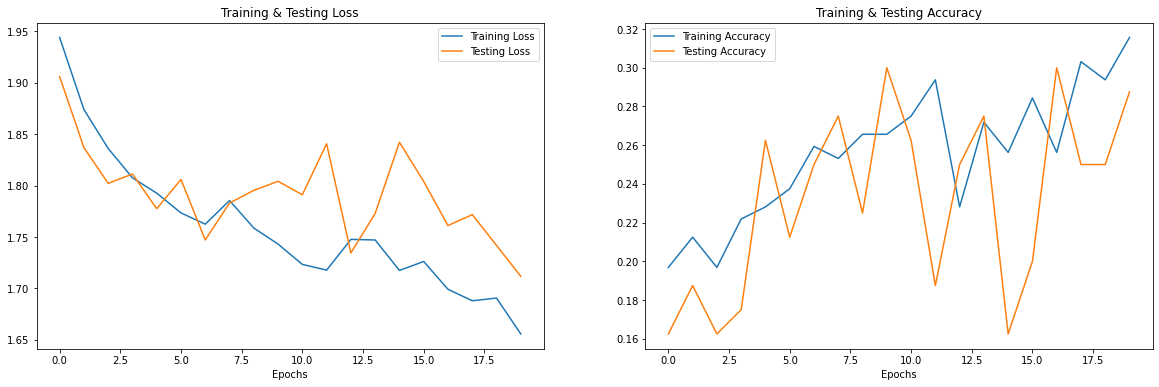

In [ ]:
print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# CNN model

In [ ]:
#Reshape for CNN MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((320, 2376, 1), (320, 7), (80, 2376, 1), (80, 7))

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1188, 512)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 594, 512)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 594, 512)         

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=10, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/10
5/5 [==============================] - 8s 264ms/step - loss: 2.1968 - accuracy: 0.3688 - val_loss: 2.2018 - val_accuracy: 0.1625
Epoch 2/10
5/5 [==============================] - 1s 181ms/step - loss: 0.7469 - accuracy: 0.7312 - val_loss: 1.6107 - val_accuracy: 0.4375
Epoch 3/10
5/5 [==============================] - 1s 182ms/step - loss: 0.2778 - accuracy: 0.9094 - val_loss: 0.9710 - val_accuracy: 0.6375
Epoch 4/10
5/5 [==============================] - 1s 181ms/step - loss: 0.1433 - accuracy: 0.9563 - val_loss: 1.3733 - val_accuracy: 0.4625
Epoch 5/10
5/5 [==============================] - 1s 183ms/step - loss: 0.0944 - accuracy: 0.9750 - val_loss: 2.1199 - val_accuracy: 0.2625
Epoch 6/10
5/5 [==============================] - 1s 182ms/step - loss: 0.0369 - accuracy: 0.9969 - val_loss: 3.0381 - val_accuracy: 0.1750
Epoch 7/10
5/5 [==============================] - 1s 189ms/step - loss: 0.0321 - accuracy: 0.9969 - val_loss: 4.1977 - val_accuracy: 0.1375
Epoch 8/10
5/5 [====

3/3 [==============================] - 0s 24ms/step - loss: 5.6301 - accuracy: 0.1375
Accuracy of our model on test data :  13.750000298023224 %


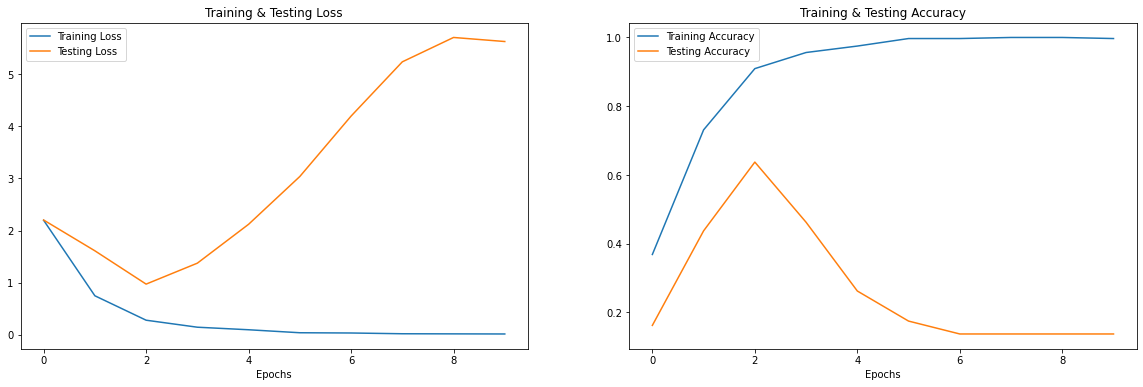

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

,Predicted Labels,Actual Labels
0,sad,angry
1,sad,disgust
2,sad,disgust
3,sad,angry
4,sad,sad
5,sad,surprise
6,sad,angry
7,sad,sad
8,sad,sad
9,sad,happy


In [ ]:
df0

,Predicted Labels,Actual Labels
0,sad,angry
1,sad,disgust
2,sad,disgust
3,sad,angry
4,sad,sad
...,...,...
75,sad,neutral
76,sad,angry
77,sad,neutral
78,sad,disgust


Some plots of multi_model
______________________________________________


# Evalutation

Results of best model

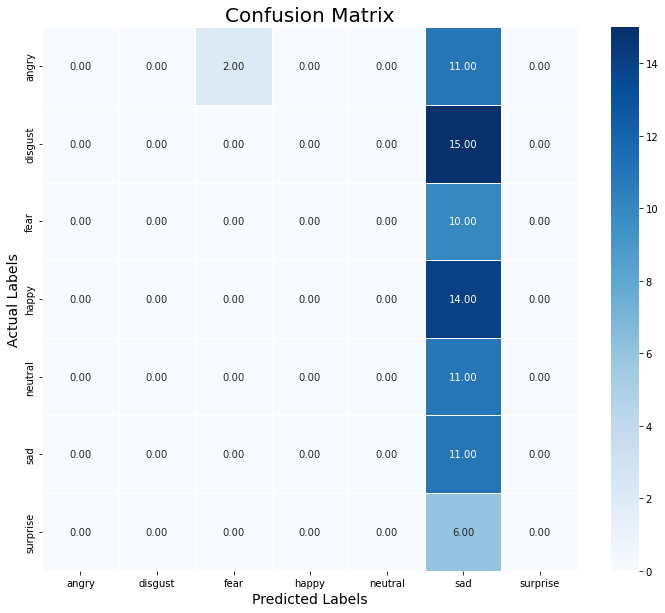

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        13
     disgust       0.00      0.00      0.00        15
        fear       0.00      0.00      0.00        10
       happy       0.00      0.00      0.00        14
     neutral       0.00      0.00      0.00        11
         sad       0.14      1.00      0.25        11
    surprise       0.00      0.00      0.00         6

    accuracy                           0.14        80
   macro avg       0.02      0.14      0.04        80
weighted avg       0.02      0.14      0.03        80



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

# Saving Best Model

In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model.summary()
model_json = model.to_json()
with open("Best_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Best_model_weights.h5")
print("Saved model to disk")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1188, 512)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 594, 512)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 594, 512)         

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/kaggle/working/Best_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/kaggle/working/Best_model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

3/3 [==============================] - 0s 22ms/step - loss: 5.6301 - accuracy: 0.1375
accuracy: 13.75%


# Saving and Loading our Standard Scaler and encoder
* To save the StandardScaler object to use it later incase

pickle file


In [ ]:
""""import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")    """

'"import pickle\n\n# Saving scaler\nwith open(\'scaler2.pickle\', \'wb\') as f:\n    pickle.dump(scaler, f)\n\n# Loading scaler\nwith open(\'scaler2.pickle\', \'rb\') as f:\n    scaler2 = pickle.load(f)\n\n# Saving encoder\nwith open(\'encoder2.pickle\', \'wb\') as f:\n    pickle.dump(encoder, f)\n\n# Loading encoder\nwith open(\'encoder2.pickle\', \'rb\') as f:\n    encoder2 = pickle.load(f)\n\n    \nprint("Done")    '

# Test script
* That can predict new record

In [ ]:
# Scale the features X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Load the model architecture and weights (you can modify this part as necessary)
json_file = open('/kaggle/working/Best_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
import librosa

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [ ]:
def get_predict_feat(path):
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    features = extract_features(data)
    features = np.reshape(features, newshape=(1, 2376))  # Adjust feature shape as needed
    scaled_features = scaler.transform(features)
    final_features = np.expand_dims(scaled_features, axis=2)

    return final_features

In [ ]:
res=get_predict_feat("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-07-01-01-01-01.wav")
print(res.shape)

(1, 2376, 1)


In [ ]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    features = get_predict_feat(path1)
    predictions = loaded_model.predict(features)
    y_pred = encoder.inverse_transform(predictions)
    print("Predicted Emotion:", y_pred[0][0])

In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav")

Predicted Emotion: surprise


In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav")

Predicted Emotion: surprise


In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-02-02-01.wav")

Predicted Emotion: surprise


In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_21/03-01-04-02-02-02-21.wav")

Predicted Emotion: surprise


In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-01-02-02-02.wav")

Predicted Emotion: surprise


In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-08-01-01-01-01.wav")

Predicted Emotion: surprise


In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-07-01-01-01-01.wav")

Predicted Emotion: surprise


Random Forest accuracy: 87.5%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       1.00      0.93      0.97        15
           2       0.90      0.90      0.90        10
           3       1.00      0.64      0.78        14
           4       0.73      1.00      0.85        11
           5       1.00      0.91      0.95        11
           6       0.83      0.83      0.83         6

    accuracy                           0.88        80
   macro avg       0.89      0.88      0.87        80
weighted avg       0.90      0.88      0.87        80

SVM accuracy: 95.0%
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10
           3       1.00      0.79      0.88        14
           4      

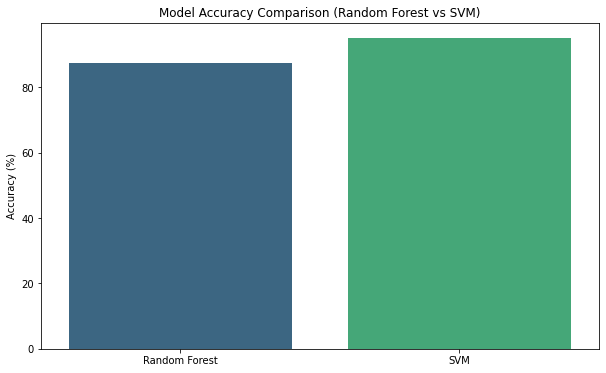

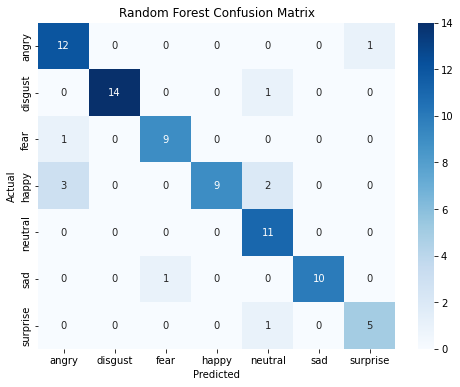

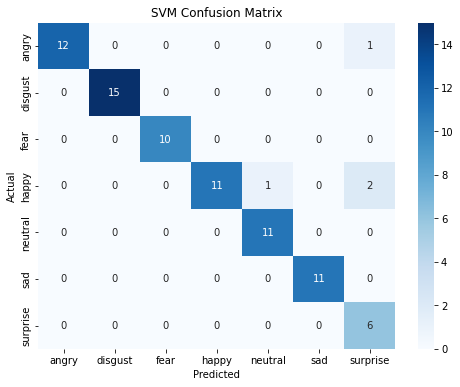

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming Emotions DataFrame is already available
# Feature matrix X (without last column) and target vector Y (last column 'Emotions')

# Extracting X (features) and Y (emotions)
X = Emotions.iloc[:, :-1].values
Y = Emotions['Emotions'].values

# One-hot encoding Y
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y_encoded = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y_encoded, random_state=42, test_size=0.2, shuffle=True)

# Flattening X for classifiers like Random Forest and SVM (which don't take 3D data like NN models)
x_train_flat = x_train
x_test_flat = x_test

# Decoding one-hot encoded labels for classifiers
y_train_decoded = np.argmax(y_train, axis=1)
y_test_decoded = np.argmax(y_test, axis=1)

# Scale features for SVM
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Random Forest Classifier
def build_rf_model():
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(x_train_flat, y_train_decoded)
    y_pred_rf = rf_model.predict(x_test_flat)
    accuracy_rf = accuracy_score(y_test_decoded, y_pred_rf) * 100
    return rf_model, accuracy_rf, y_pred_rf

# SVM Classifier
def build_svm_model():
    svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
    svm_model.fit(x_train_scaled, y_train_decoded)
    y_pred_svm = svm_model.predict(x_test_scaled)
    accuracy_svm = accuracy_score(y_test_decoded, y_pred_svm) * 100
    return svm_model, accuracy_svm, y_pred_svm

# Build and evaluate Random Forest
rf_model, accuracy_rf, y_pred_rf = build_rf_model()
print(f"Random Forest accuracy: {accuracy_rf}%")
print(f"Random Forest Classification Report:\n{classification_report(y_test_decoded, y_pred_rf)}")

# Build and evaluate SVM
svm_model, accuracy_svm, y_pred_svm = build_svm_model()
print(f"SVM accuracy: {accuracy_svm}%")
print(f"SVM Classification Report:\n{classification_report(y_test_decoded, y_pred_svm)}")

# Visual Comparison of Models
models = ['Random Forest', 'SVM']
accuracies = [accuracy_rf, accuracy_svm]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison (Random Forest vs SVM)")
plt.ylabel("Accuracy (%)")
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test_decoded, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("Random Forest Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test_decoded, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("SVM Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
